## Case#01 Estimation of the SBP and DBP using ECG and PPG Signals

In [292]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Acess the dataset

In [293]:
import pandas as pd

# Define the file path (update the path as needed)
file_path = "/content/drive/MyDrive/24_Patient_Project_ECG_PPG_Bio/final_ECG+PPG+Bio/Case_1_ECG_PPG/Case_1_ECG_PPG_final.csv"  # Replace with your actual file path

# Read the CSV file
df = pd.read_csv(file_path)
df


,R_Peak_time,PAT_Max,PPG_Peak_time,PPG_Peak_amplitude,R_Peak_amplitude,Pulse_Interval(ms),R_R_Interval,Heart_Rate(bpm),Systolic_blood_pressure (mmHg),Diastolic_blood_pressure (mmHg),...,Pulse_Pressure(mmHg),Stroke_Volume(ml),Cardiac_Output (L/min),Subject,Age,Height(cm),Weight(kg),Gender,Posture,Session
0,2017-10-11 18:09:51.829,290.000,2017-10-11 18:09:52.119,974.504,22.499,657.000,664.000,90,124,81,...,43,57.104,5.139,1,44,165,100,Female,Handgrip,1
1,2017-10-11 18:09:52.473,292.000,2017-10-11 18:09:52.765,899.462,21.937,646.000,644.000,93,123,81,...,42,54.096,5.031,1,44,165,100,Female,Handgrip,1
2,2017-10-11 18:09:53.113,288.000,2017-10-11 18:09:53.401,949.886,16.821,636.000,640.000,93,125,82,...,43,55.040,5.119,1,44,165,100,Female,Handgrip,1
3,2017-10-11 18:09:53.765,281.000,2017-10-11 18:09:54.046,948.092,22.513,645.000,652.000,92,128,84,...,44,57.376,5.279,1,44,165,100,Female,Handgrip,1
4,2017-10-11 18:09:55.095,283.000,2017-10-11 18:09:55.378,777.342,22.542,668.000,520.000,115,127,83,...,44,45.760,5.262,1,44,165,100,Female,Handgrip,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17908,2017-11-15 15:39:51.761,510.000,2017-11-15 15:39:52.271,101.892,33.019,741.000,779.000,77,85,53,...,32,49.856,3.839,12,58,175,83,Female,R_Rest,5
17909,2017-11-15 15:39:52.373,368.000,2017-11-15 15:39:52.741,85.771,36.333,470.000,612.000,98,96,61,...,35,42.840,4.198,12,58,175,83,Female,R_Rest,5
17910,2017-11-15 15:39:53.079,328.000,2017-11-15 15:39:53.407,170.600,35.488,666.000,706.000,84,101,65,...,36,50.832,4.270,12,58,175,83,Female,R_Rest,5
17911,2017-11-15 15:39:53.785,316.000,2017-11-15 15:39:54.101,287.212,30.598,694.000,706.000,84,103,66,...,37,52.244,4.388,12,58,175,83,Female,R_Rest,5


In [294]:
df.shape

(17913, 21)

In [295]:
df.columns

Index(['R_Peak_time', 'PAT_Max', 'PPG_Peak_time', 'PPG_Peak_amplitude',
       'R_Peak_amplitude', 'Pulse_Interval(ms)', 'R_R_Interval',
       'Heart_Rate(bpm)', 'Systolic_blood_pressure (mmHg)',
       'Diastolic_blood_pressure (mmHg)', 'Mean (mmHg)',
       'Pulse_Pressure(mmHg)', 'Stroke_Volume(ml)', 'Cardiac_Output (L/min)',
       'Subject', 'Age', 'Height(cm)', 'Weight(kg)', 'Gender', 'Posture',
       'Session'],
      dtype='object')

In [296]:
df.dtypes

,0
R_Peak_time,object
PAT_Max,float64
PPG_Peak_time,object
PPG_Peak_amplitude,float64
R_Peak_amplitude,float64
Pulse_Interval(ms),float64
R_R_Interval,float64
Heart_Rate(bpm),int64
Systolic_blood_pressure (mmHg),int64
Diastolic_blood_pressure (mmHg),int64


### check Unique values of the each column

In [297]:
#Loop through each column and print the unique values
for column in df.columns:
    unique_values = df[column].unique()
    count_values  = len(df[column].unique())
    print(f"Column: {column}")
    #print(f"Unique Values: {unique_values}\n")
    print(f"total count unique values : { count_values}\n")

Column: R_Peak_time
total count unique values : 17830

Column: PAT_Max
total count unique values : 461

Column: PPG_Peak_time
total count unique values : 17830

Column: PPG_Peak_amplitude
total count unique values : 17830

Column: R_Peak_amplitude
total count unique values : 17830

Column: Pulse_Interval(ms)
total count unique values : 678

Column: R_R_Interval
total count unique values : 681

Column: Heart_Rate(bpm)
total count unique values : 141

Column: Systolic_blood_pressure (mmHg)
total count unique values : 71

Column: Diastolic_blood_pressure (mmHg)
total count unique values : 51

Column: Mean (mmHg)
total count unique values : 61

Column: Pulse_Pressure(mmHg)
total count unique values : 22

Column: Stroke_Volume(ml)
total count unique values : 5851

Column: Cardiac_Output (L/min)
total count unique values : 5099

Column: Subject
total count unique values : 12

Column: Age
total count unique values : 12

Column: Height(cm)
total count unique values : 9

Column: Weight(kg)
tota

### check the skewness of the data

In [298]:
# Calculate skewness for each numeric column in the DataFrame and print the result
numeric_columns = df.select_dtypes(include=['number'])  # Select only numeric columns
for column in numeric_columns.columns:
    skew_value = df[column].skew()
    print(f"Skewness of '{column}': {skew_value:.4f}")

Skewness of 'PAT_Max': 2.3818
Skewness of 'PPG_Peak_amplitude': 0.9685
Skewness of 'R_Peak_amplitude': 1.1790
Skewness of 'Pulse_Interval(ms)': 0.2373
Skewness of 'R_R_Interval': -0.0833
Skewness of 'Heart_Rate(bpm)': 1.6036
Skewness of 'Systolic_blood_pressure (mmHg)': -0.2953
Skewness of 'Diastolic_blood_pressure (mmHg)': -0.2939
Skewness of 'Mean (mmHg)': -0.2959
Skewness of 'Pulse_Pressure(mmHg)': -0.2953
Skewness of 'Stroke_Volume(ml)': 0.0780
Skewness of 'Cardiac_Output (L/min)': -0.2944
Skewness of 'Subject': 0.0264
Skewness of 'Age': -0.2521
Skewness of 'Height(cm)': -1.0130
Skewness of 'Weight(kg)': 0.5741
Skewness of 'Session': -0.3131


In [299]:
df

,R_Peak_time,PAT_Max,PPG_Peak_time,PPG_Peak_amplitude,R_Peak_amplitude,Pulse_Interval(ms),R_R_Interval,Heart_Rate(bpm),Systolic_blood_pressure (mmHg),Diastolic_blood_pressure (mmHg),...,Pulse_Pressure(mmHg),Stroke_Volume(ml),Cardiac_Output (L/min),Subject,Age,Height(cm),Weight(kg),Gender,Posture,Session
0,2017-10-11 18:09:51.829,290.000,2017-10-11 18:09:52.119,974.504,22.499,657.000,664.000,90,124,81,...,43,57.104,5.139,1,44,165,100,Female,Handgrip,1
1,2017-10-11 18:09:52.473,292.000,2017-10-11 18:09:52.765,899.462,21.937,646.000,644.000,93,123,81,...,42,54.096,5.031,1,44,165,100,Female,Handgrip,1
2,2017-10-11 18:09:53.113,288.000,2017-10-11 18:09:53.401,949.886,16.821,636.000,640.000,93,125,82,...,43,55.040,5.119,1,44,165,100,Female,Handgrip,1
3,2017-10-11 18:09:53.765,281.000,2017-10-11 18:09:54.046,948.092,22.513,645.000,652.000,92,128,84,...,44,57.376,5.279,1,44,165,100,Female,Handgrip,1
4,2017-10-11 18:09:55.095,283.000,2017-10-11 18:09:55.378,777.342,22.542,668.000,520.000,115,127,83,...,44,45.760,5.262,1,44,165,100,Female,Handgrip,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17908,2017-11-15 15:39:51.761,510.000,2017-11-15 15:39:52.271,101.892,33.019,741.000,779.000,77,85,53,...,32,49.856,3.839,12,58,175,83,Female,R_Rest,5
17909,2017-11-15 15:39:52.373,368.000,2017-11-15 15:39:52.741,85.771,36.333,470.000,612.000,98,96,61,...,35,42.840,4.198,12,58,175,83,Female,R_Rest,5
17910,2017-11-15 15:39:53.079,328.000,2017-11-15 15:39:53.407,170.600,35.488,666.000,706.000,84,101,65,...,36,50.832,4.270,12,58,175,83,Female,R_Rest,5
17911,2017-11-15 15:39:53.785,316.000,2017-11-15 15:39:54.101,287.212,30.598,694.000,706.000,84,103,66,...,37,52.244,4.388,12,58,175,83,Female,R_Rest,5


### check Outliers

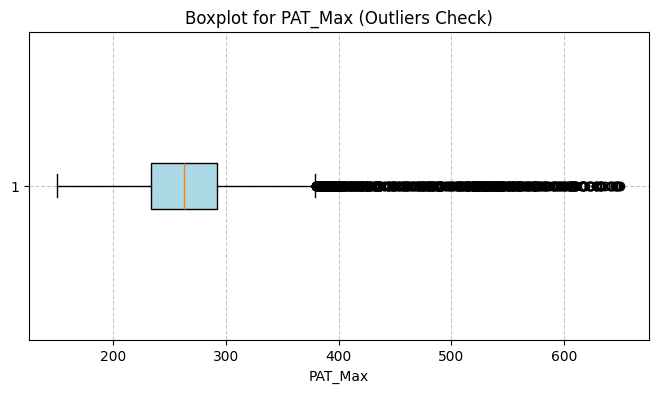

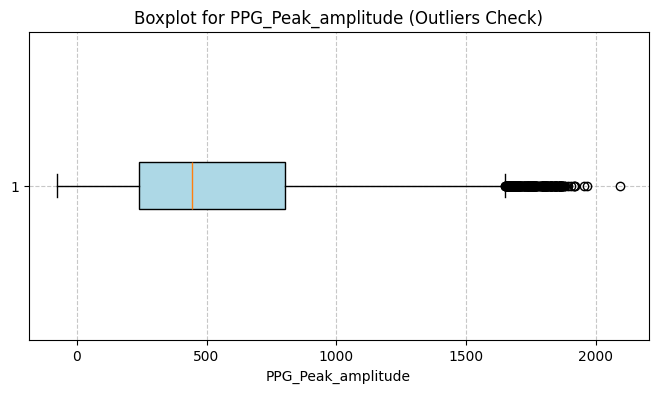

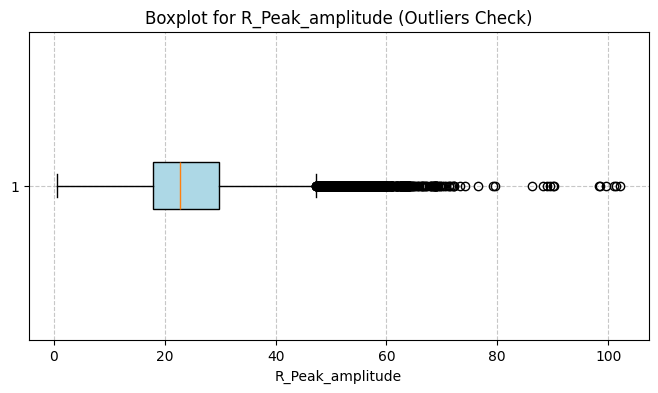

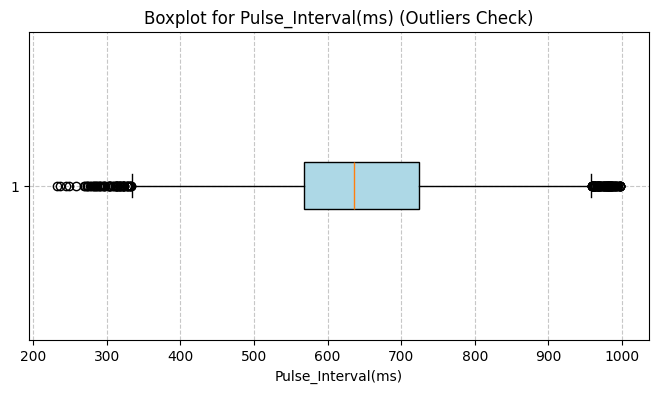

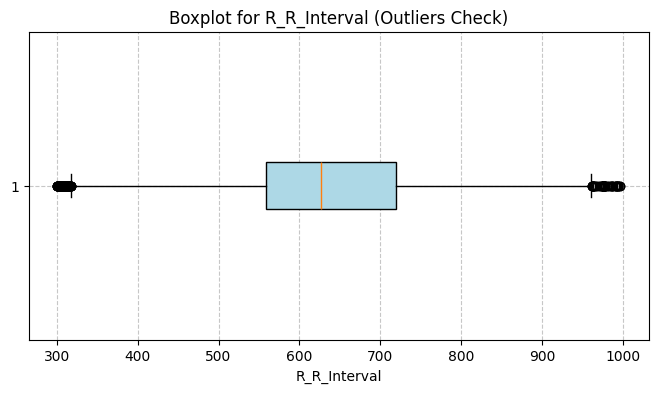

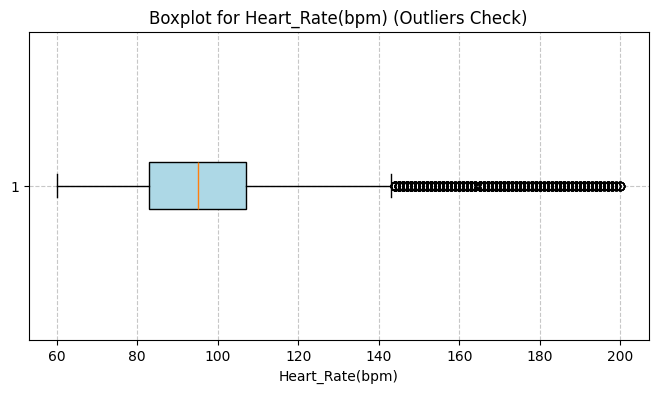

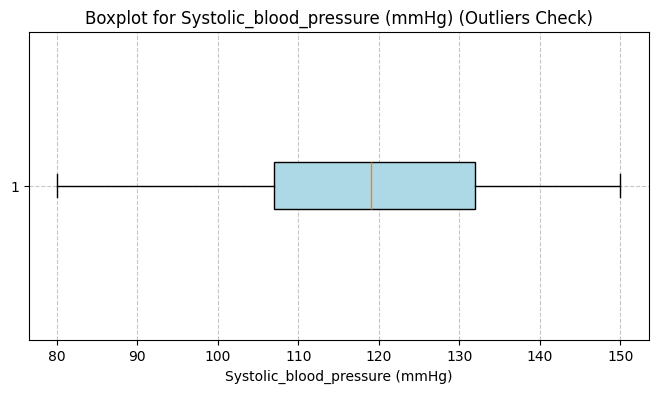

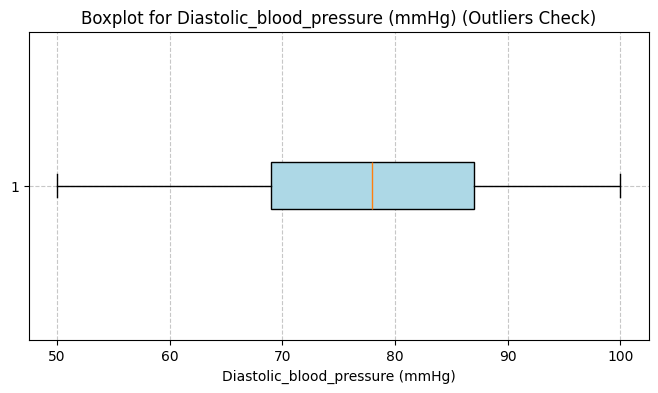

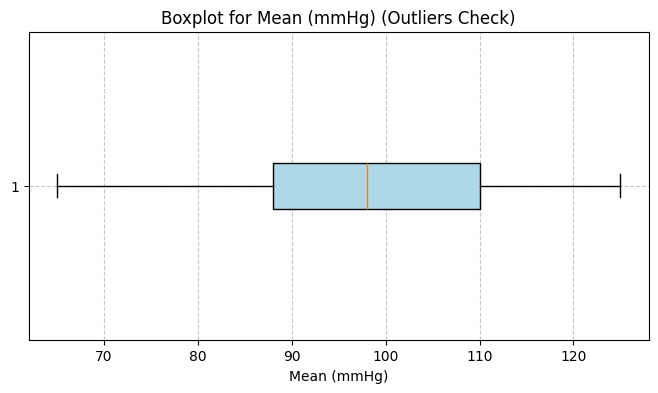

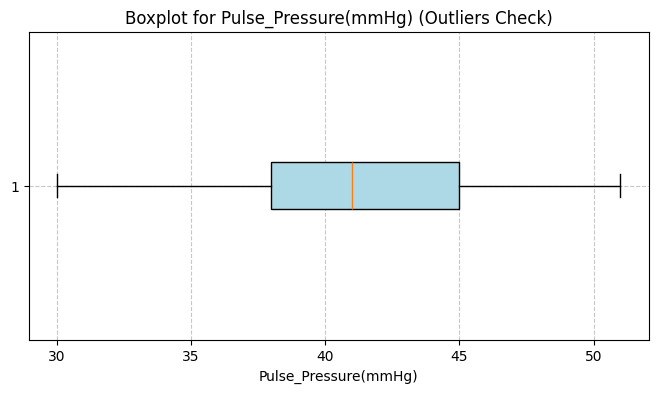

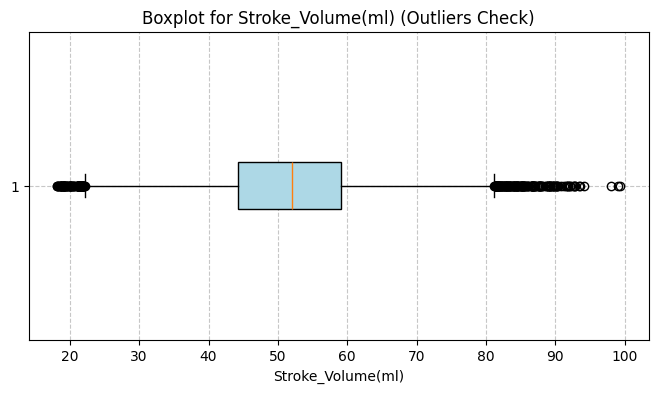

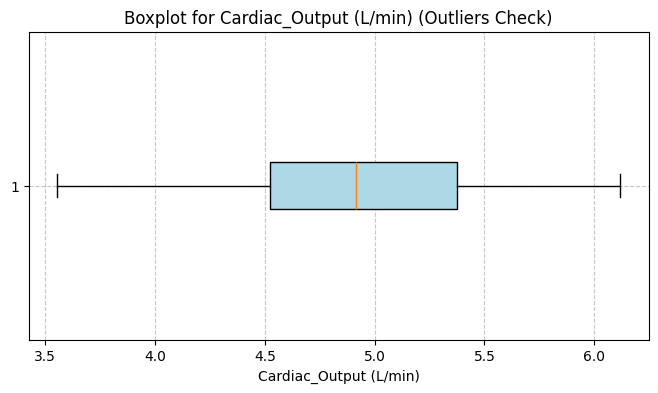

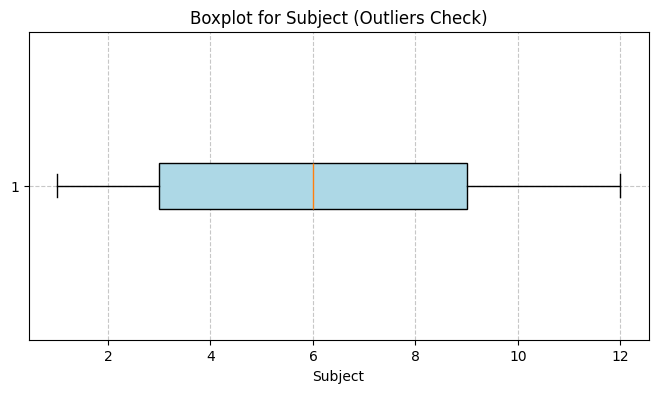

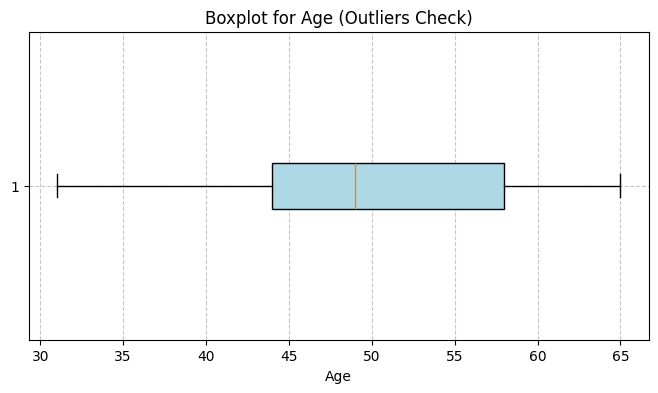

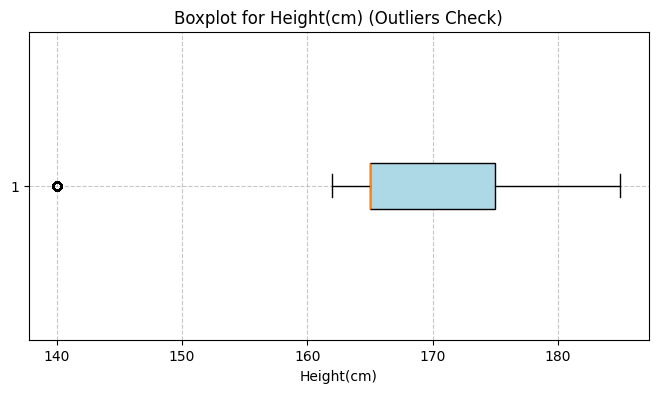

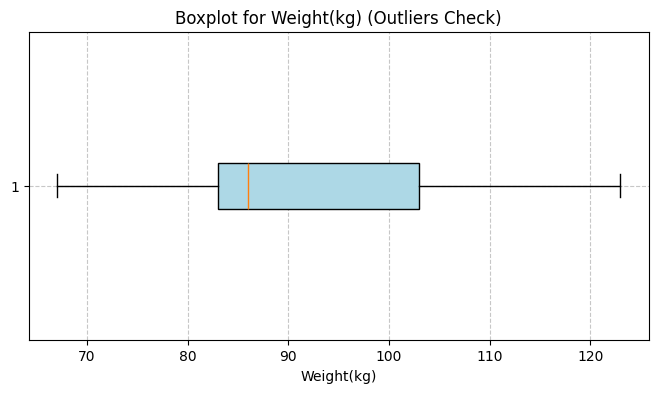

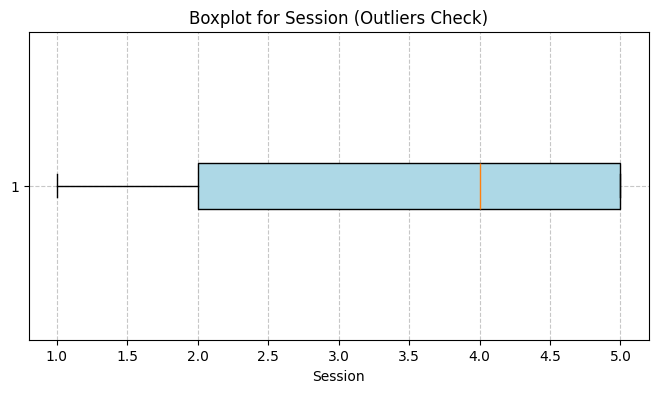

In [300]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset (Assuming df is already loaded)
# df = pd.read_csv('your_dataset.csv')  # Uncomment if loading from a file

# Function to plot outliers for all numeric columns using boxplots
def plot_outliers(df):
    numeric_columns = df.select_dtypes(include=['number']).columns

    for column in numeric_columns:
        plt.figure(figsize=(8, 4))
        plt.boxplot(df[column].dropna(), vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))
        plt.title(f'Boxplot for {column} (Outliers Check)')
        plt.xlabel(column)
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.show()

# Display outliers for all columns
plot_outliers(df)


### check data_types of the columns

In [301]:
df.dtypes

,0
R_Peak_time,object
PAT_Max,float64
PPG_Peak_time,object
PPG_Peak_amplitude,float64
R_Peak_amplitude,float64
Pulse_Interval(ms),float64
R_R_Interval,float64
Heart_Rate(bpm),int64
Systolic_blood_pressure (mmHg),int64
Diastolic_blood_pressure (mmHg),int64


### object column values is converted into numericals

In [302]:
print(df['Posture'].unique())

['Handgrip' 'L_Cycling' 'L_Rest' 'M_Cycling' 'M_Rest' 'HV_Cycling'
 'HV_Rest' 'R_Rest']


In [303]:
import pandas as pd

# Sample DataFrame 'df'
# Assuming 'df' is your dataset

# Check current 'Gender' values (just for understanding)
print(df['Posture'].unique())

# Map 'Gender' values to integers (e.g., 'Male' -> 1, 'Female' -> 0)
df['Posture'] = df['Posture'].map({'Handgrip': 1, 'L_Cycling': 2, 'L_Rest':3,'M_Cycling':4,
                                  'M_Rest':5,'HV_Cycling':6,'HV_Rest':7,'R_Rest':8})

# If there are other categories or missing values, you may need to handle them
# For example, mapping 'Other' or NaN values to a default integer (e.g., -1)
df['Posture'] = df['Posture'].fillna(-1).astype('int64')

# Display the updated DataFrame and check the datatype of 'Gender'
#print(df.dtypes)
print(df['Posture'].head())

['Handgrip' 'L_Cycling' 'L_Rest' 'M_Cycling' 'M_Rest' 'HV_Cycling'
 'HV_Rest' 'R_Rest']
0    1
1    1
2    1
3    1
4    1
Name: Posture, dtype: int64


In [304]:
df

,R_Peak_time,PAT_Max,PPG_Peak_time,PPG_Peak_amplitude,R_Peak_amplitude,Pulse_Interval(ms),R_R_Interval,Heart_Rate(bpm),Systolic_blood_pressure (mmHg),Diastolic_blood_pressure (mmHg),...,Pulse_Pressure(mmHg),Stroke_Volume(ml),Cardiac_Output (L/min),Subject,Age,Height(cm),Weight(kg),Gender,Posture,Session
0,2017-10-11 18:09:51.829,290.000,2017-10-11 18:09:52.119,974.504,22.499,657.000,664.000,90,124,81,...,43,57.104,5.139,1,44,165,100,Female,1,1
1,2017-10-11 18:09:52.473,292.000,2017-10-11 18:09:52.765,899.462,21.937,646.000,644.000,93,123,81,...,42,54.096,5.031,1,44,165,100,Female,1,1
2,2017-10-11 18:09:53.113,288.000,2017-10-11 18:09:53.401,949.886,16.821,636.000,640.000,93,125,82,...,43,55.040,5.119,1,44,165,100,Female,1,1
3,2017-10-11 18:09:53.765,281.000,2017-10-11 18:09:54.046,948.092,22.513,645.000,652.000,92,128,84,...,44,57.376,5.279,1,44,165,100,Female,1,1
4,2017-10-11 18:09:55.095,283.000,2017-10-11 18:09:55.378,777.342,22.542,668.000,520.000,115,127,83,...,44,45.760,5.262,1,44,165,100,Female,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17908,2017-11-15 15:39:51.761,510.000,2017-11-15 15:39:52.271,101.892,33.019,741.000,779.000,77,85,53,...,32,49.856,3.839,12,58,175,83,Female,8,5
17909,2017-11-15 15:39:52.373,368.000,2017-11-15 15:39:52.741,85.771,36.333,470.000,612.000,98,96,61,...,35,42.840,4.198,12,58,175,83,Female,8,5
17910,2017-11-15 15:39:53.079,328.000,2017-11-15 15:39:53.407,170.600,35.488,666.000,706.000,84,101,65,...,36,50.832,4.270,12,58,175,83,Female,8,5
17911,2017-11-15 15:39:53.785,316.000,2017-11-15 15:39:54.101,287.212,30.598,694.000,706.000,84,103,66,...,37,52.244,4.388,12,58,175,83,Female,8,5


In [305]:
import pandas as pd

# Sample DataFrame 'df'
# Assuming 'df' is your dataset

# Check current 'Gender' values (just for understanding)
print(df['Gender'].unique())

# Map 'Gender' values to integers (e.g., 'Male' -> 1, 'Female' -> 0)
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})

# If there are other categories or missing values, you may need to handle them
# For example, mapping 'Other' or NaN values to a default integer (e.g., -1)
df['Gender'] = df['Gender'].fillna(-1).astype('int64')

# Display the updated DataFrame and check the datatype of 'Gender'
#print(df.dtypes)
print(df['Gender'].head())

['Female' 'Male']
0    0
1    0
2    0
3    0
4    0
Name: Gender, dtype: int64


In [306]:
df

,R_Peak_time,PAT_Max,PPG_Peak_time,PPG_Peak_amplitude,R_Peak_amplitude,Pulse_Interval(ms),R_R_Interval,Heart_Rate(bpm),Systolic_blood_pressure (mmHg),Diastolic_blood_pressure (mmHg),...,Pulse_Pressure(mmHg),Stroke_Volume(ml),Cardiac_Output (L/min),Subject,Age,Height(cm),Weight(kg),Gender,Posture,Session
0,2017-10-11 18:09:51.829,290.000,2017-10-11 18:09:52.119,974.504,22.499,657.000,664.000,90,124,81,...,43,57.104,5.139,1,44,165,100,0,1,1
1,2017-10-11 18:09:52.473,292.000,2017-10-11 18:09:52.765,899.462,21.937,646.000,644.000,93,123,81,...,42,54.096,5.031,1,44,165,100,0,1,1
2,2017-10-11 18:09:53.113,288.000,2017-10-11 18:09:53.401,949.886,16.821,636.000,640.000,93,125,82,...,43,55.040,5.119,1,44,165,100,0,1,1
3,2017-10-11 18:09:53.765,281.000,2017-10-11 18:09:54.046,948.092,22.513,645.000,652.000,92,128,84,...,44,57.376,5.279,1,44,165,100,0,1,1
4,2017-10-11 18:09:55.095,283.000,2017-10-11 18:09:55.378,777.342,22.542,668.000,520.000,115,127,83,...,44,45.760,5.262,1,44,165,100,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17908,2017-11-15 15:39:51.761,510.000,2017-11-15 15:39:52.271,101.892,33.019,741.000,779.000,77,85,53,...,32,49.856,3.839,12,58,175,83,0,8,5
17909,2017-11-15 15:39:52.373,368.000,2017-11-15 15:39:52.741,85.771,36.333,470.000,612.000,98,96,61,...,35,42.840,4.198,12,58,175,83,0,8,5
17910,2017-11-15 15:39:53.079,328.000,2017-11-15 15:39:53.407,170.600,35.488,666.000,706.000,84,101,65,...,36,50.832,4.270,12,58,175,83,0,8,5
17911,2017-11-15 15:39:53.785,316.000,2017-11-15 15:39:54.101,287.212,30.598,694.000,706.000,84,103,66,...,37,52.244,4.388,12,58,175,83,0,8,5


### Convert Timestamps & Format Output Properly
### R_Peak_time ,PPG_Peak_time , foot_idx_time and its type is numeric

In [307]:
import pandas as pd


# Convert to datetime format
df['R_Peak_time'] = pd.to_datetime(df['R_Peak_time'])

# Convert datetime to UNIX timestamp (seconds with milliseconds)
df['R_Peak_timestamp'] = df['R_Peak_time'].astype(int) / 10**9  # Convert to seconds with milliseconds

# Format R_Peak_time to keep the original format
df['R_Peak_time'] = df['R_Peak_time'].dt.strftime('%Y-%m-%d %H:%M:%S.%f').str[:-3]  # Keep milliseconds

# Ensure full numeric format without scientific notation
pd.set_option('display.float_format', lambda x: '%.3f' % x)




In [308]:
df

,R_Peak_time,PAT_Max,PPG_Peak_time,PPG_Peak_amplitude,R_Peak_amplitude,Pulse_Interval(ms),R_R_Interval,Heart_Rate(bpm),Systolic_blood_pressure (mmHg),Diastolic_blood_pressure (mmHg),...,Stroke_Volume(ml),Cardiac_Output (L/min),Subject,Age,Height(cm),Weight(kg),Gender,Posture,Session,R_Peak_timestamp
0,2017-10-11 18:09:51.829,290.000,2017-10-11 18:09:52.119,974.504,22.499,657.000,664.000,90,124,81,...,57.104,5.139,1,44,165,100,0,1,1,1507745391.829
1,2017-10-11 18:09:52.473,292.000,2017-10-11 18:09:52.765,899.462,21.937,646.000,644.000,93,123,81,...,54.096,5.031,1,44,165,100,0,1,1,1507745392.473
2,2017-10-11 18:09:53.113,288.000,2017-10-11 18:09:53.401,949.886,16.821,636.000,640.000,93,125,82,...,55.040,5.119,1,44,165,100,0,1,1,1507745393.113
3,2017-10-11 18:09:53.765,281.000,2017-10-11 18:09:54.046,948.092,22.513,645.000,652.000,92,128,84,...,57.376,5.279,1,44,165,100,0,1,1,1507745393.765
4,2017-10-11 18:09:55.095,283.000,2017-10-11 18:09:55.378,777.342,22.542,668.000,520.000,115,127,83,...,45.760,5.262,1,44,165,100,0,1,1,1507745395.095
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17908,2017-11-15 15:39:51.761,510.000,2017-11-15 15:39:52.271,101.892,33.019,741.000,779.000,77,85,53,...,49.856,3.839,12,58,175,83,0,8,5,1510760391.761
17909,2017-11-15 15:39:52.373,368.000,2017-11-15 15:39:52.741,85.771,36.333,470.000,612.000,98,96,61,...,42.840,4.198,12,58,175,83,0,8,5,1510760392.373
17910,2017-11-15 15:39:53.079,328.000,2017-11-15 15:39:53.407,170.600,35.488,666.000,706.000,84,101,65,...,50.832,4.270,12,58,175,83,0,8,5,1510760393.079
17911,2017-11-15 15:39:53.785,316.000,2017-11-15 15:39:54.101,287.212,30.598,694.000,706.000,84,103,66,...,52.244,4.388,12,58,175,83,0,8,5,1510760393.785


In [309]:
df.columns

Index(['R_Peak_time', 'PAT_Max', 'PPG_Peak_time', 'PPG_Peak_amplitude',
       'R_Peak_amplitude', 'Pulse_Interval(ms)', 'R_R_Interval',
       'Heart_Rate(bpm)', 'Systolic_blood_pressure (mmHg)',
       'Diastolic_blood_pressure (mmHg)', 'Mean (mmHg)',
       'Pulse_Pressure(mmHg)', 'Stroke_Volume(ml)', 'Cardiac_Output (L/min)',
       'Subject', 'Age', 'Height(cm)', 'Weight(kg)', 'Gender', 'Posture',
       'Session', 'R_Peak_timestamp'],
      dtype='object')

In [310]:
# Convert to datetime format
df['PPG_Peak_time'] = pd.to_datetime(df['PPG_Peak_time'])

# Convert datetime to UNIX timestamp (seconds with milliseconds)
df['PPG_Peak_timestamp'] = df['PPG_Peak_time'].astype(int) / 10**9  # Convert to seconds with milliseconds

# Format R_Peak_time to keep the original format
df['PPG_Peak_time'] = df['PPG_Peak_time'].dt.strftime('%Y-%m-%d %H:%M:%S.%f').str[:-3]  # Keep milliseconds

# Ensure full numeric format without scientific notation
pd.set_option('display.float_format', lambda x: '%.3f' % x)


In [311]:
df

,R_Peak_time,PAT_Max,PPG_Peak_time,PPG_Peak_amplitude,R_Peak_amplitude,Pulse_Interval(ms),R_R_Interval,Heart_Rate(bpm),Systolic_blood_pressure (mmHg),Diastolic_blood_pressure (mmHg),...,Cardiac_Output (L/min),Subject,Age,Height(cm),Weight(kg),Gender,Posture,Session,R_Peak_timestamp,PPG_Peak_timestamp
0,2017-10-11 18:09:51.829,290.000,2017-10-11 18:09:52.119,974.504,22.499,657.000,664.000,90,124,81,...,5.139,1,44,165,100,0,1,1,1507745391.829,1507745392.119
1,2017-10-11 18:09:52.473,292.000,2017-10-11 18:09:52.765,899.462,21.937,646.000,644.000,93,123,81,...,5.031,1,44,165,100,0,1,1,1507745392.473,1507745392.765
2,2017-10-11 18:09:53.113,288.000,2017-10-11 18:09:53.401,949.886,16.821,636.000,640.000,93,125,82,...,5.119,1,44,165,100,0,1,1,1507745393.113,1507745393.401
3,2017-10-11 18:09:53.765,281.000,2017-10-11 18:09:54.046,948.092,22.513,645.000,652.000,92,128,84,...,5.279,1,44,165,100,0,1,1,1507745393.765,1507745394.046
4,2017-10-11 18:09:55.095,283.000,2017-10-11 18:09:55.378,777.342,22.542,668.000,520.000,115,127,83,...,5.262,1,44,165,100,0,1,1,1507745395.095,1507745395.378
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17908,2017-11-15 15:39:51.761,510.000,2017-11-15 15:39:52.271,101.892,33.019,741.000,779.000,77,85,53,...,3.839,12,58,175,83,0,8,5,1510760391.761,1510760392.271
17909,2017-11-15 15:39:52.373,368.000,2017-11-15 15:39:52.741,85.771,36.333,470.000,612.000,98,96,61,...,4.198,12,58,175,83,0,8,5,1510760392.373,1510760392.741
17910,2017-11-15 15:39:53.079,328.000,2017-11-15 15:39:53.407,170.600,35.488,666.000,706.000,84,101,65,...,4.270,12,58,175,83,0,8,5,1510760393.079,1510760393.407
17911,2017-11-15 15:39:53.785,316.000,2017-11-15 15:39:54.101,287.212,30.598,694.000,706.000,84,103,66,...,4.388,12,58,175,83,0,8,5,1510760393.785,1510760394.101


In [312]:
df

,R_Peak_time,PAT_Max,PPG_Peak_time,PPG_Peak_amplitude,R_Peak_amplitude,Pulse_Interval(ms),R_R_Interval,Heart_Rate(bpm),Systolic_blood_pressure (mmHg),Diastolic_blood_pressure (mmHg),...,Cardiac_Output (L/min),Subject,Age,Height(cm),Weight(kg),Gender,Posture,Session,R_Peak_timestamp,PPG_Peak_timestamp
0,2017-10-11 18:09:51.829,290.000,2017-10-11 18:09:52.119,974.504,22.499,657.000,664.000,90,124,81,...,5.139,1,44,165,100,0,1,1,1507745391.829,1507745392.119
1,2017-10-11 18:09:52.473,292.000,2017-10-11 18:09:52.765,899.462,21.937,646.000,644.000,93,123,81,...,5.031,1,44,165,100,0,1,1,1507745392.473,1507745392.765
2,2017-10-11 18:09:53.113,288.000,2017-10-11 18:09:53.401,949.886,16.821,636.000,640.000,93,125,82,...,5.119,1,44,165,100,0,1,1,1507745393.113,1507745393.401
3,2017-10-11 18:09:53.765,281.000,2017-10-11 18:09:54.046,948.092,22.513,645.000,652.000,92,128,84,...,5.279,1,44,165,100,0,1,1,1507745393.765,1507745394.046
4,2017-10-11 18:09:55.095,283.000,2017-10-11 18:09:55.378,777.342,22.542,668.000,520.000,115,127,83,...,5.262,1,44,165,100,0,1,1,1507745395.095,1507745395.378
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17908,2017-11-15 15:39:51.761,510.000,2017-11-15 15:39:52.271,101.892,33.019,741.000,779.000,77,85,53,...,3.839,12,58,175,83,0,8,5,1510760391.761,1510760392.271
17909,2017-11-15 15:39:52.373,368.000,2017-11-15 15:39:52.741,85.771,36.333,470.000,612.000,98,96,61,...,4.198,12,58,175,83,0,8,5,1510760392.373,1510760392.741
17910,2017-11-15 15:39:53.079,328.000,2017-11-15 15:39:53.407,170.600,35.488,666.000,706.000,84,101,65,...,4.270,12,58,175,83,0,8,5,1510760393.079,1510760393.407
17911,2017-11-15 15:39:53.785,316.000,2017-11-15 15:39:54.101,287.212,30.598,694.000,706.000,84,103,66,...,4.388,12,58,175,83,0,8,5,1510760393.785,1510760394.101


In [313]:
# Remove columns 'B' and 'D' permanently
df.drop(['R_Peak_time','PPG_Peak_time'], axis=1, inplace=True)

In [314]:
df

,PAT_Max,PPG_Peak_amplitude,R_Peak_amplitude,Pulse_Interval(ms),R_R_Interval,Heart_Rate(bpm),Systolic_blood_pressure (mmHg),Diastolic_blood_pressure (mmHg),Mean (mmHg),Pulse_Pressure(mmHg),...,Cardiac_Output (L/min),Subject,Age,Height(cm),Weight(kg),Gender,Posture,Session,R_Peak_timestamp,PPG_Peak_timestamp
0,290.000,974.504,22.499,657.000,664.000,90,124,81,102,43,...,5.139,1,44,165,100,0,1,1,1507745391.829,1507745392.119
1,292.000,899.462,21.937,646.000,644.000,93,123,81,102,42,...,5.031,1,44,165,100,0,1,1,1507745392.473,1507745392.765
2,288.000,949.886,16.821,636.000,640.000,93,125,82,104,43,...,5.119,1,44,165,100,0,1,1,1507745393.113,1507745393.401
3,281.000,948.092,22.513,645.000,652.000,92,128,84,106,44,...,5.279,1,44,165,100,0,1,1,1507745393.765,1507745394.046
4,283.000,777.342,22.542,668.000,520.000,115,127,83,105,44,...,5.262,1,44,165,100,0,1,1,1507745395.095,1507745395.378
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17908,510.000,101.892,33.019,741.000,779.000,77,85,53,69,32,...,3.839,12,58,175,83,0,8,5,1510760391.761,1510760392.271
17909,368.000,85.771,36.333,470.000,612.000,98,96,61,78,35,...,4.198,12,58,175,83,0,8,5,1510760392.373,1510760392.741
17910,328.000,170.600,35.488,666.000,706.000,84,101,65,83,36,...,4.270,12,58,175,83,0,8,5,1510760393.079,1510760393.407
17911,316.000,287.212,30.598,694.000,706.000,84,103,66,84,37,...,4.388,12,58,175,83,0,8,5,1510760393.785,1510760394.101


In [315]:
# Remove columns 'B' and 'D' permanently
df.drop(['R_Peak_timestamp','PPG_Peak_timestamp'], axis=1, inplace=True)

In [316]:
df.dtypes

,0
PAT_Max,float64
PPG_Peak_amplitude,float64
R_Peak_amplitude,float64
Pulse_Interval(ms),float64
R_R_Interval,float64
Heart_Rate(bpm),int64
Systolic_blood_pressure (mmHg),int64
Diastolic_blood_pressure (mmHg),int64
Mean (mmHg),int64
Pulse_Pressure(mmHg),int64


In [317]:
##check the Correlation of the features

#import pandas as pd
#import matplotlib.pyplot as plt
#import seaborn as sns

# Compute the correlation matrix (only numeric columns)
#correlation_matrix = df.corr()

# Display the correlation matrix as a heatmap
#plt.figure(figsize=(12, 8))
#sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
#plt.title("Correlation Matrix Heatmap")
#plt.show()


In [318]:
df.columns

Index(['PAT_Max', 'PPG_Peak_amplitude', 'R_Peak_amplitude',
       'Pulse_Interval(ms)', 'R_R_Interval', 'Heart_Rate(bpm)',
       'Systolic_blood_pressure (mmHg)', 'Diastolic_blood_pressure (mmHg)',
       'Mean (mmHg)', 'Pulse_Pressure(mmHg)', 'Stroke_Volume(ml)',
       'Cardiac_Output (L/min)', 'Subject', 'Age', 'Height(cm)', 'Weight(kg)',
       'Gender', 'Posture', 'Session'],
      dtype='object')

In [319]:
import pandas as pd

# Example: Display specific columns together
#columns_to_display = df[['PAT_Max', 'Systolic_blood_pressure (mmHg)', 'Diastolic_blood_pressure (mmHg)']]  # Replace with your column names
#selected_columns = df[columns_to_display]
#print(selected_columns)
df[['PAT_Max', 'Systolic_blood_pressure (mmHg)', 'Diastolic_blood_pressure (mmHg)']]


,PAT_Max,Systolic_blood_pressure (mmHg),Diastolic_blood_pressure (mmHg)
0,290.000,124,81
1,292.000,123,81
2,288.000,125,82
3,281.000,128,84
4,283.000,127,83
...,...,...,...
17908,510.000,85,53
17909,368.000,96,61
17910,328.000,101,65
17911,316.000,103,66


In [320]:
df.drop(['Mean (mmHg)','Cardiac_Output (L/min)','Pulse_Pressure(mmHg)'], axis=1, inplace=True)

### copy the dataset

In [321]:
df1 = df.copy()
df2 = df.copy()
df3 = df.copy()
df4 = df.copy()

In [322]:
df1.drop(['Diastolic_blood_pressure (mmHg)'], axis=1, inplace=True)


### Systolic Blood Pressure using Linear Regression

In [323]:
X = df1.drop(['Systolic_blood_pressure (mmHg)'], axis=1)
Y = df1[['Systolic_blood_pressure (mmHg)']]

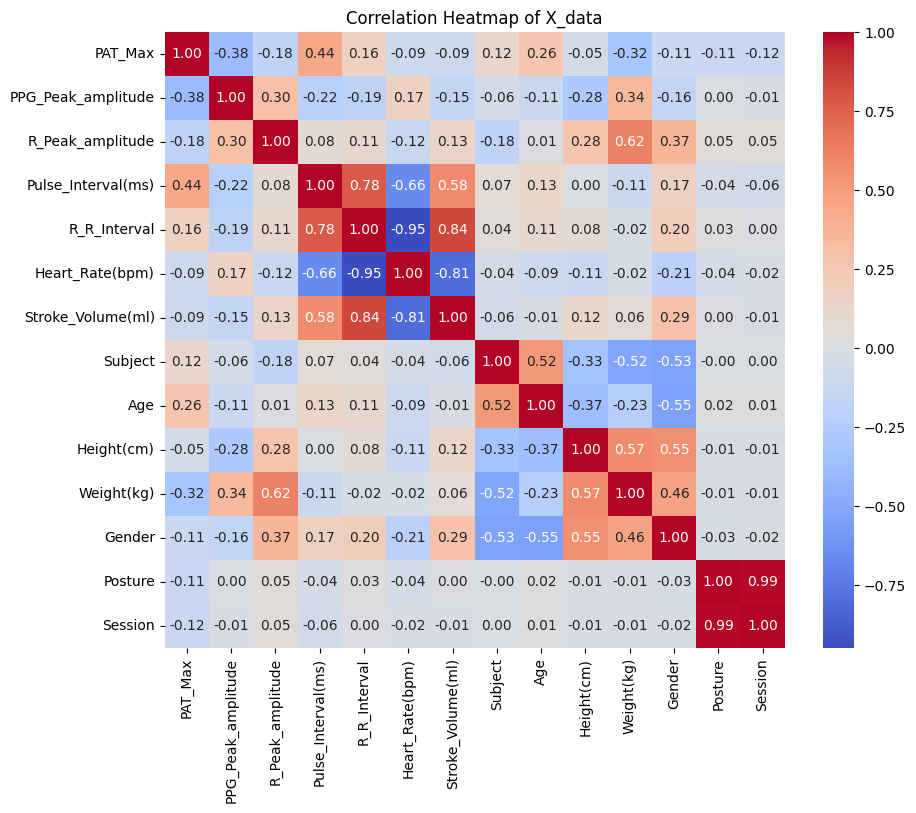

In [324]:
import seaborn as sns
import matplotlib.pyplot as plt
# Select and compute correlation matrix
#selected_data = df[selected_columns]
correlation_matrix = X.corr()

# Create and display the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Heatmap of X_data')
plt.show()


In [325]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30, random_state = 0,shuffle=True)

In [326]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler_features = MinMaxScaler()
scaler_target = MinMaxScaler()

In [327]:
X_train_scaled = scaler_features.fit_transform(X_train)

In [328]:
X_test_scaled = scaler_features.transform(X_test)

In [329]:
# Scale the target (Glucose_level) for y_train and y_test
y_train_scaled = scaler_target.fit_transform(y_train)
y_test_scaled = scaler_target.transform(y_test)

In [330]:
#write code here
from sklearn.linear_model import LinearRegression

In [331]:
#write code here
lr = LinearRegression()
lr.fit(X_train_scaled,y_train_scaled)

LinearRegression()

In [332]:
#write code here
lr_predict = lr.predict(X_test_scaled)

In [333]:
#write code here
lr_r2_train =lr.predict(X_train_scaled)

In [334]:
# Step 8: Inverse transform X_test, y_test, and the predictions back to their original values
X_test_original = scaler_features.inverse_transform(X_test_scaled)
y_test_original = scaler_target.inverse_transform(y_test_scaled)
y_pred_original = scaler_target.inverse_transform(lr_predict)

In [335]:
from sklearn.metrics import mean_absolute_error
mae1 = mean_absolute_error(y_test_scaled,lr_predict)
print(f"Mean Absolute Error of the tesing data : {mae1}")

Mean Absolute Error of the tesing data : 0.03266003584081337


In [336]:
from sklearn.metrics import mean_squared_error
mse1 = mean_squared_error(y_test_scaled,lr_predict)
print(f"Mean Squared Error of testing data : {mse1}")

Mean Squared Error of testing data : 0.0020554806640344023


In [337]:
# Calculate Mean Squared Error
#mse = mean_squared_error(y_test,lr_predict)
import numpy as np
# Calculate Root Mean Squared Error
rmse1 = np.sqrt(mse1)
print(f"Root Mean Squared Error of testing data : {rmse1}")

Root Mean Squared Error of testing data : 0.04533740910147383


In [338]:
#write code here
#mean squre error
from sklearn.metrics import r2_score
lr_r2_test1= r2_score(y_test_scaled,lr_predict)

In [339]:
from sklearn.metrics import r2_score
lr_r2_train= r2_score(y_train_scaled,lr_r2_train)

In [340]:
#print('R2 score for Linear Regression Taining Data is: ', lr_r2_train)
print('R2 score for Linear Regression Testing Data is: ', lr_r2_test1)

R2 score for Linear Regression Testing Data is:  0.9648851941017951


In [341]:
# Inverse transform the scaled values
y_test_actual = scaler_target .inverse_transform(y_test_scaled)
y_test_predict_actual = scaler_target .inverse_transform(lr_predict)


# Show the model predictions vs actual values
y_test_actual = pd.Series(y_test_actual.flatten(), name='Actual SBP')
y_test_predict_actual = pd.Series(y_test_predict_actual.flatten(), name='Predict SBP')
predictions1 = pd.DataFrame({'Actual SBP': y_test_actual, 'Predict SBP': y_test_predict_actual})
#predictions1

In [342]:
# Add an 'Index' column with automatic sequential values starting from 1
predictions1['Index'] = range(1, len(predictions1) + 1)

# Display the updated DataFrame
predictions1

,Actual SBP,Predict SBP,Index
0,138.000,139.883,1
1,122.000,121.593,2
2,112.000,111.998,3
3,116.000,115.347,4
4,129.000,127.662,5
...,...,...,...
5369,129.000,126.211,5370
5370,131.000,130.617,5371
5371,131.000,133.275,5372
5372,92.000,95.725,5373


The Linear Regression Model Reasult for the Systolic Blood Pressure


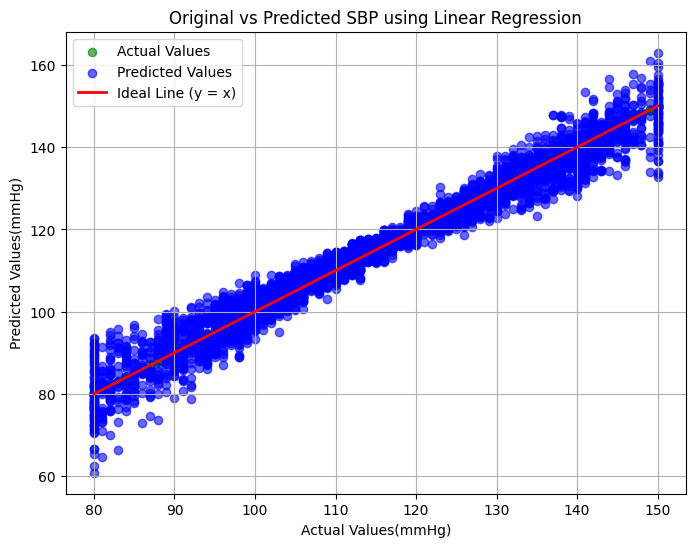

In [343]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming `predictions1` is the dataset with actual and predicted values
# Extract actual values and predicted values from the dataset
actual_values = predictions1['Actual SBP']
predicted_values = predictions1['Predict SBP']

# Create a scatter plot of actual vs predicted values
plt.figure(figsize=(8, 6))

# Plot actual values in blue (circle marker)
plt.scatter(actual_values, actual_values, color='green', alpha=0.6, label='Actual Values', marker='o')

# Plot predicted values in green (circle marker)
plt.scatter(actual_values, predicted_values, color='blue', alpha=0.6, label='Predicted Values', marker='o')

# Plot the ideal line y = x (this represents perfect predictions)
plt.plot([min(actual_values), max(actual_values)], [min(actual_values), max(actual_values)], color='red', linewidth=2, label='Ideal Line (y = x)')

# Add titles and labels
print("The Linear Regression Model Reasult for the Systolic Blood Pressure")
plt.title('Original vs Predicted SBP using Linear Regression')
plt.xlabel('Actual Values(mmHg)')
plt.ylabel('Predicted Values(mmHg)')

# Add legend
plt.legend()

# Display the plot
plt.grid(True)
plt.show()


In [344]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

# Perform 10-Fold Cross-Validation
cv_r2 = cross_val_score(lr, X_train_scaled, y_train_scaled.ravel(), cv=10, scoring='r2')
cv_rmse = cross_val_score(lr, X_train_scaled, y_train_scaled.ravel(), cv=5, scoring='neg_root_mean_squared_error')

# Display the results
print(f'Cross-Validation R² Scores: {cv_r2}')
print(f'Average R²: {cv_r2.mean()}')
print(f'Cross-Validation RMSE: {-cv_rmse.mean()}')

Cross-Validation R² Scores: [0.96525131 0.9631771  0.96294625 0.96727193 0.96288668 0.95928303
 0.96528768 0.96560065 0.96381953 0.96244428]
Average R²: 0.9637968447736271
Cross-Validation RMSE: 0.04593030686165679


### Diastolic Blood Pressure using Linear Regression

In [345]:
df2.columns

Index(['PAT_Max', 'PPG_Peak_amplitude', 'R_Peak_amplitude',
       'Pulse_Interval(ms)', 'R_R_Interval', 'Heart_Rate(bpm)',
       'Systolic_blood_pressure (mmHg)', 'Diastolic_blood_pressure (mmHg)',
       'Stroke_Volume(ml)', 'Subject', 'Age', 'Height(cm)', 'Weight(kg)',
       'Gender', 'Posture', 'Session'],
      dtype='object')

In [346]:
df2.drop(['Systolic_blood_pressure (mmHg)'], axis=1, inplace=True)


In [347]:
df2

,PAT_Max,PPG_Peak_amplitude,R_Peak_amplitude,Pulse_Interval(ms),R_R_Interval,Heart_Rate(bpm),Diastolic_blood_pressure (mmHg),Stroke_Volume(ml),Subject,Age,Height(cm),Weight(kg),Gender,Posture,Session
0,290.000,974.504,22.499,657.000,664.000,90,81,57.104,1,44,165,100,0,1,1
1,292.000,899.462,21.937,646.000,644.000,93,81,54.096,1,44,165,100,0,1,1
2,288.000,949.886,16.821,636.000,640.000,93,82,55.040,1,44,165,100,0,1,1
3,281.000,948.092,22.513,645.000,652.000,92,84,57.376,1,44,165,100,0,1,1
4,283.000,777.342,22.542,668.000,520.000,115,83,45.760,1,44,165,100,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17908,510.000,101.892,33.019,741.000,779.000,77,53,49.856,12,58,175,83,0,8,5
17909,368.000,85.771,36.333,470.000,612.000,98,61,42.840,12,58,175,83,0,8,5
17910,328.000,170.600,35.488,666.000,706.000,84,65,50.832,12,58,175,83,0,8,5
17911,316.000,287.212,30.598,694.000,706.000,84,66,52.244,12,58,175,83,0,8,5


In [348]:
X = df2.drop(['Diastolic_blood_pressure (mmHg)'], axis=1)
Y = df2[['Diastolic_blood_pressure (mmHg)']]

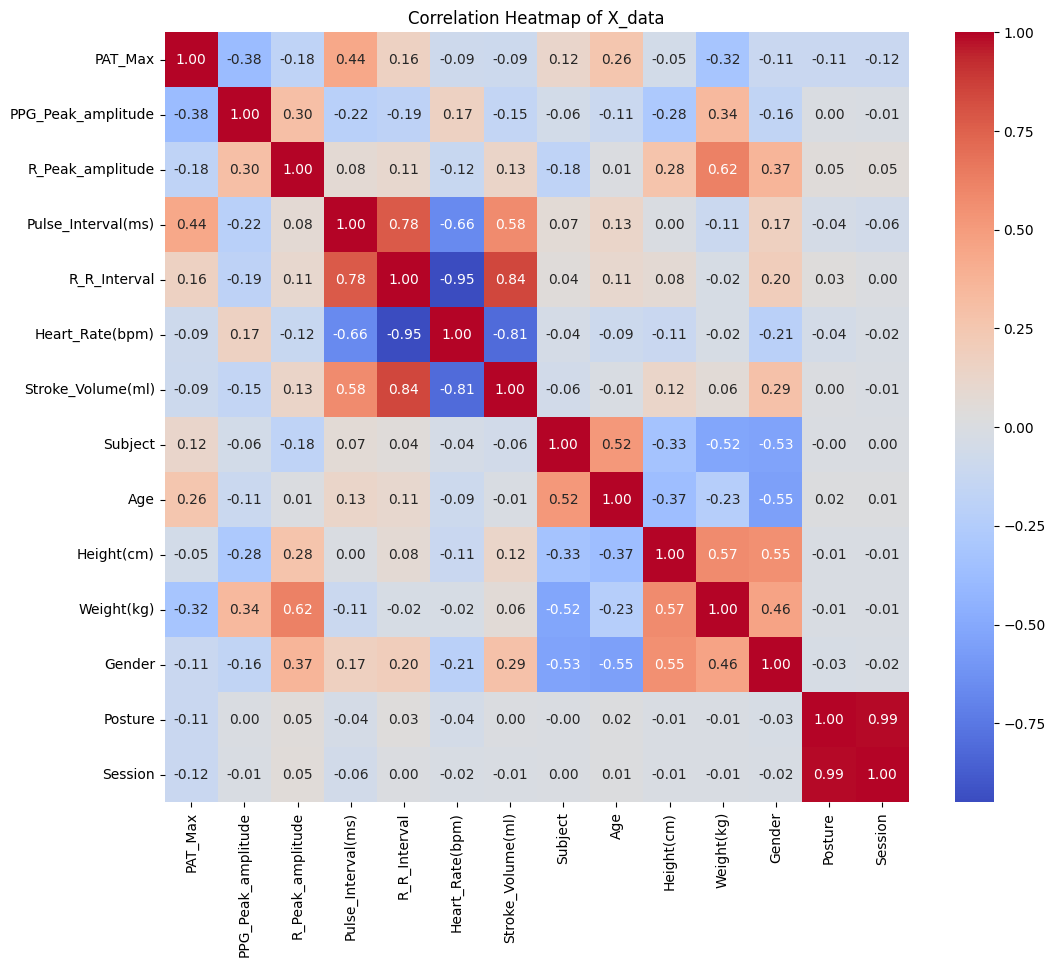

In [349]:
# Select and compute correlation matrix
#selected_data = df[selected_columns]
correlation_matrix = X.corr()

# Create and display the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Heatmap of X_data')
plt.show()

In [350]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30, random_state = 0,shuffle=True )

In [351]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler_features = MinMaxScaler()
scaler_target = MinMaxScaler()

In [352]:
X_train_scaled = scaler_features.fit_transform(X_train)

In [353]:
X_test_scaled = scaler_features.transform(X_test)

In [354]:
# Scale the target (Glucose_level) for y_train and y_test
y_train_scaled = scaler_target.fit_transform(y_train)
y_test_scaled = scaler_target.transform(y_test)

In [355]:
#write code here
from sklearn.linear_model import LinearRegression

In [356]:
#write code here
lr = LinearRegression()
lr.fit(X_train_scaled,y_train_scaled)

LinearRegression()

In [357]:
#write code here
lr_predict = lr.predict(X_test_scaled)

In [358]:
#write code here
lr_r2_train =lr.predict(X_train_scaled)

In [359]:
# Step 8: Inverse transform X_test, y_test, and the predictions back to their original values
X_test_original = scaler_features.inverse_transform(X_test_scaled)
y_test_original = scaler_target.inverse_transform(y_test_scaled)
y_pred_original = scaler_target.inverse_transform(lr_predict)

In [360]:
from sklearn.metrics import mean_absolute_error
mae2 = mean_absolute_error(y_test_scaled,lr_predict)
print(f"Mean Absolute Error of the tesing data : {mae2}")

Mean Absolute Error of the tesing data : 0.03572723613101553


In [361]:
from sklearn.metrics import mean_squared_error
mse2 = mean_squared_error(y_test_scaled,lr_predict)
print(f"Mean Squared Error of testing data : {mse2}")

Mean Squared Error of testing data : 0.0023217037085429063


In [362]:
# Calculate Mean Squared Error
#mse = mean_squared_error(y_test,lr_predict)
import numpy as np
# Calculate Root Mean Squared Error
rmse2 = np.sqrt(mse2)
print(f"Root Mean Squared Error of testing data : {rmse2}")

Root Mean Squared Error of testing data : 0.048184060731147456


In [363]:
#write code here
#mean squre error
from sklearn.metrics import r2_score
lr_r2_test2= r2_score(y_test_scaled,lr_predict)

In [364]:
from sklearn.metrics import r2_score
lr_r2_train= r2_score(y_train_scaled,lr_r2_train)

In [365]:
#print('R2 score for Linear Regression Training Data is: ', lr_r2_train)
print('R2 score for Linear Regression Testing Data is: ', lr_r2_test2)

R2 score for Linear Regression Testing Data is:  0.9603619337863456


In [366]:
# Inverse transform the scaled values
y_test_actual = scaler_target .inverse_transform(y_test_scaled)
y_test_predict_actual = scaler_target .inverse_transform(lr_predict)


# Show the model predictions vs actual values
y_test_actual = pd.Series(y_test_actual.flatten(), name='Actual DBP')
y_test_predict_actual = pd.Series(y_test_predict_actual.flatten(), name='Predicted DBP')
predictions2 = pd.DataFrame({'Actual DBP': y_test_actual, 'Predict DBP': y_test_predict_actual})
#predictions2

# Assuming predictions1 is your original dataframe
# Filter rows where both 'Actual Systolic Blood Pressure' and 'Model Predicted Systolic Blood Pressure' are >= 90
#predictions2 = predictions2[(predictions2['Actual Diastolic Blood Pressure'] >= 40) &
                            #(predictions2['Model Predicted Diastolic Blood Pressure'] >= 40)]

# Display the filtered predictions1 dataset
#predictions2

In [367]:
# Add an 'Index' column with automatic sequential values starting from 1
predictions2['Index'] = range(1, len(predictions2) + 1)

# Display the updated DataFrame
#print(predictions1)

In [368]:
predictions2

,Actual DBP,Predict DBP,Index
0,91.000,92.590,1
1,80.000,79.574,2
2,73.000,72.732,3
3,76.000,75.111,4
4,85.000,83.895,5
...,...,...,...
5369,85.000,82.869,5370
5370,86.000,85.963,5371
5371,86.000,87.879,5372
5372,59.000,61.149,5373


The Linear Regression Model Reasult for the Diastolic Blood Pressure


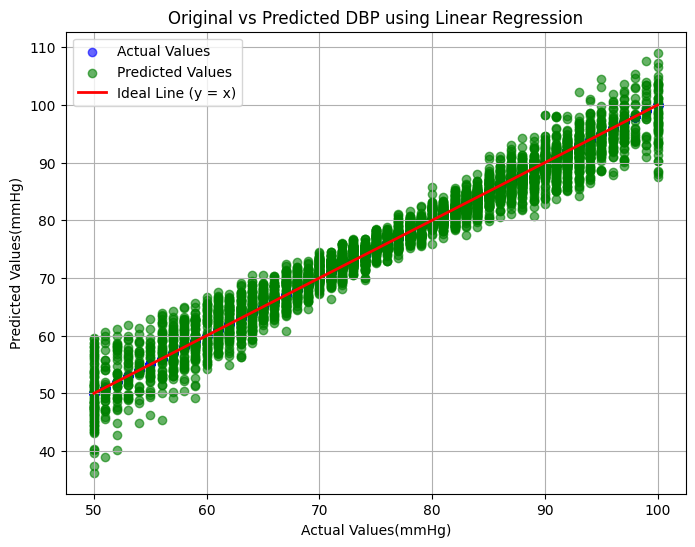

In [369]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming `predictions1` is the dataset with actual and predicted values
# Extract actual values and predicted values from the dataset
actual_values = predictions2['Actual DBP']
predicted_values = predictions2['Predict DBP']

# Create a scatter plot of actual vs predicted values
plt.figure(figsize=(8, 6))

# Plot actual values in blue (circle marker)
plt.scatter(actual_values, actual_values, color='blue', alpha=0.6, label='Actual Values', marker='o')

# Plot predicted values in green (circle marker)
plt.scatter(actual_values, predicted_values, color='green', alpha=0.6, label='Predicted Values', marker='o')

# Plot the ideal line y = x (this represents perfect predictions)
plt.plot([min(actual_values), max(actual_values)], [min(actual_values), max(actual_values)], color='red', linewidth=2, label='Ideal Line (y = x)')

# Add titles and labels
print("The Linear Regression Model Reasult for the Diastolic Blood Pressure")
plt.title('Original vs Predicted DBP using Linear Regression')
plt.xlabel('Actual Values(mmHg)')
plt.ylabel('Predicted Values(mmHg)')

# Add legend
plt.legend()

# Display the plot
plt.grid(True)
plt.show()


In [370]:
# Merge the two datasets on 'ID' column
merged_predictions = pd.merge(predictions1,predictions2,on='Index',how='left')

# Remove the 'Age' column
merged_predictions = merged_predictions.drop('Index', axis=1)

# Display the merged dataset
print("The Reasult of the Linear Regression in SBP and DBP")
merged_predictions

The Reasult of the Linear Regression in SBP and DBP


,Actual SBP,Predict SBP,Actual DBP,Predict DBP
0,138.000,139.883,91.000,92.590
1,122.000,121.593,80.000,79.574
2,112.000,111.998,73.000,72.732
3,116.000,115.347,76.000,75.111
4,129.000,127.662,85.000,83.895
...,...,...,...,...
5369,129.000,126.211,85.000,82.869
5370,131.000,130.617,86.000,85.963
5371,131.000,133.275,86.000,87.879
5372,92.000,95.725,59.000,61.149


### Systolic Blood Pressure using  Convolutional Neural Netwrok Model

In [371]:
df3.drop(['Diastolic_blood_pressure (mmHg)'], axis=1, inplace=True)

In [372]:
df3

,PAT_Max,PPG_Peak_amplitude,R_Peak_amplitude,Pulse_Interval(ms),R_R_Interval,Heart_Rate(bpm),Systolic_blood_pressure (mmHg),Stroke_Volume(ml),Subject,Age,Height(cm),Weight(kg),Gender,Posture,Session
0,290.000,974.504,22.499,657.000,664.000,90,124,57.104,1,44,165,100,0,1,1
1,292.000,899.462,21.937,646.000,644.000,93,123,54.096,1,44,165,100,0,1,1
2,288.000,949.886,16.821,636.000,640.000,93,125,55.040,1,44,165,100,0,1,1
3,281.000,948.092,22.513,645.000,652.000,92,128,57.376,1,44,165,100,0,1,1
4,283.000,777.342,22.542,668.000,520.000,115,127,45.760,1,44,165,100,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17908,510.000,101.892,33.019,741.000,779.000,77,85,49.856,12,58,175,83,0,8,5
17909,368.000,85.771,36.333,470.000,612.000,98,96,42.840,12,58,175,83,0,8,5
17910,328.000,170.600,35.488,666.000,706.000,84,101,50.832,12,58,175,83,0,8,5
17911,316.000,287.212,30.598,694.000,706.000,84,103,52.244,12,58,175,83,0,8,5


In [373]:
df3.columns

Index(['PAT_Max', 'PPG_Peak_amplitude', 'R_Peak_amplitude',
       'Pulse_Interval(ms)', 'R_R_Interval', 'Heart_Rate(bpm)',
       'Systolic_blood_pressure (mmHg)', 'Stroke_Volume(ml)', 'Subject', 'Age',
       'Height(cm)', 'Weight(kg)', 'Gender', 'Posture', 'Session'],
      dtype='object')

In [374]:
X = df3.drop(['Systolic_blood_pressure (mmHg)'], axis=1)
y = df3[['Systolic_blood_pressure (mmHg)']]

In [375]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten, Dropout, MaxPooling1D
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
#np.random.seed(42)

In [376]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [377]:
# Convert DataFrame to NumPy arrays if they are DataFrames
X_train = np.array(X_train)
X_test = np.array(X_test)

In [378]:
# Reshape data for CNN (1D convolution expects input shape: [samples, time_steps, features])
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [379]:
# Scale the target variable (optional, for better performance)
y_train = np.array(y_train).reshape(-1, 1)  # Convert y_train to numpy array and reshape
y_test = np.array(y_test).reshape(-1, 1)    # Convert y_test to numpy array and reshape


In [380]:
y_scaler = StandardScaler()
y_train = y_scaler.fit_transform(y_train).flatten()  # Flatten after scaling
y_test = y_scaler.transform(y_test).flatten()        # Flatten after scaling

In [381]:
# Build CNN model
model1 = Sequential()
model1.add(Conv1D(64, 3, activation='relu', input_shape=(X_train.shape[1], 1)))
model1.add(MaxPooling1D(2))
model1.add(Dropout(0.2))
model1.add(Flatten())
model1.add(Dense(64, activation='relu'))
model1.add(Dense(1))  # Regression output (no activation function)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [382]:
# Compile the model
model1.compile(optimizer='adam', loss='mean_squared_error')

In [383]:
from tensorflow.keras.callbacks import EarlyStopping, Callback
# Define an in-memory callback for saving the model weights
class InMemoryCheckpoint(Callback):
    def __init__(self):
        super().__init__()
        self.best_weights = None

    def on_epoch_end(self, epoch, logs=None):
        # Save the best weights at the end of each epoch
        if self.best_weights is None or logs['val_loss'] < self.best_weights[0]:
            self.best_weights = (logs['val_loss'], self.model.get_weights())

    def restore_best_weights(self):
        # Restore the best weights to the model
        if self.best_weights:
            self.model.set_weights(self.best_weights[1])

In [384]:
early_stopping1 = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

In [385]:
in_memory_checkpoint1 = InMemoryCheckpoint()

In [386]:
# Train the model with the callbacks
history = model1.fit(
    X_train, y_train,
    epochs=15,
    batch_size=16,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping1, in_memory_checkpoint1]
)

Epoch 1/15
896/896 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 99.5301 - val_loss: 0.8179
Epoch 2/15
896/896 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.1747 - val_loss: 0.5177
Epoch 3/15
896/896 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.9941 - val_loss: 0.9175
Epoch 4/15
896/896 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.9151 - val_loss: 0.4875
Epoch 5/15
896/896 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.6667 - val_loss: 0.2769
Epoch 6/15
896/896 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.6345 - val_loss: 0.2206
Epoch 7/15
896/896 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.5002 - val_loss: 0.1702
Epoch 8/15
896/896 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.4422 - val_loss: 0.1936
Epoch 9/15
896/896 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.3407 - val_loss: 0.1746
Epoch 10/15
896/896 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 0.3230 - val_loss: 0.1532
Epoch 11/15
896/896 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.3040 - val_loss: 0.1863
Epoch 12/15
896/896 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/ste

In [387]:
# After training, restore the best weights
in_memory_checkpoint1.restore_best_weights()


In [388]:
# Evaluate the model
loss = model1.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")

112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1097
Test Loss: 0.10613706707954407


In [389]:
# CNN predictions
y_pred_cnn = model1.predict(X_test)

# Ensure predictions are in the correct shape for regression (flatten)
y_pred_cnn_flat = y_pred_cnn.flatten()


112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [390]:
# Calculate Mean Absolute Error (MAE)
mae3 = mean_absolute_error(y_test, y_pred_cnn)
print(f"Mean Absolute Error (MAE): {mae3}")

# Calculate Mean Squared Error (MSE)
mse3 = mean_squared_error(y_test, y_pred_cnn)
print(f"Mean Squared Error (MSE): {mse3}")

# Calculate Root Mean Squared Error (RMSE)
rmse3 = np.sqrt(mse3)
print(f"Root Mean Squared Error (RMSE): {rmse3}")

# Calculate R-squared (R2) score
lr_r2_test3 = r2_score(y_test, y_pred_cnn)
print(f"R-squared (R2) score: {lr_r2_test3}")

Mean Absolute Error (MAE): 0.22744956278292705
Mean Squared Error (MSE): 0.10613704498463765
Root Mean Squared Error (RMSE): 0.32578680910165414
R-squared (R2) score: 0.8890429473369519


In [391]:
import pandas as pd
import numpy as np

# Assuming 'scaler_target' is the scaler used for normalizing the target (e.g., MinMaxScaler, StandardScaler)
# Assuming `y_test_scaled` is the scaled actual target values from the test set.
# Assuming `y_pred_cnn_flat` is the CNN model's predicted values on the test set.

# Reshape y_test to 2D before inverse transformation
y_test_reshaped = y_test.reshape(-1, 1)  # Reshape to 2D (required by the scaler)
y_test_actual = y_scaler.inverse_transform(y_test_reshaped)  # Inverse transform the actual target values

# Reshape y_pred_cnn_flat to 2D before applying inverse_transform
y_pred_cnn_flat_reshaped = y_pred_cnn_flat.reshape(-1, 1)  # Reshape to 2D (required by the scaler)
y_test_predict_actual_cnn = y_scaler.inverse_transform(y_pred_cnn_flat_reshaped)  # Inverse transform CNN's predicted values

# Flatten the results (if they are multi-dimensional) to ensure they are 1D for comparison
y_test_actual_flat = y_test_actual.flatten()
y_test_predict_actual_cnn_flat = y_test_predict_actual_cnn.flatten()

# Convert the results into pandas Series for easy comparison
y_test_actual_series = pd.Series(y_test_actual_flat, name='Actual SBP')
y_test_predict_actual_cnn_series = pd.Series(y_test_predict_actual_cnn_flat, name='Predict SBP')

# Create a DataFrame for comparison
predictions_cnn1 = pd.DataFrame({
    'Actual SBP': y_test_actual_series,
    'Predict SBP': y_test_predict_actual_cnn_series
})

# Format the values to show 2 decimal places for consistency
predictions_cnn1['Actual SBP'] = predictions_cnn1['Actual SBP'].round(2)
predictions_cnn1['Predict SBP'] = predictions_cnn1['Predict SBP'].round(2)

# Show the predictions with formatted values
#print(predictions_cnn1)


In [392]:
# Add an 'Index' column with automatic sequential values starting from 1
predictions_cnn1['Index'] = range(1, len(predictions_cnn1) + 1)

predictions_cnn1

,Actual SBP,Predict SBP,Index
0,127.000,130.910,1
1,89.000,88.580,2
2,136.000,135.500,3
3,99.000,105.220,4
4,133.000,135.580,5
...,...,...,...
3578,94.000,96.800,3579
3579,129.000,128.750,3580
3580,132.000,132.820,3581
3581,140.000,137.110,3582


In [393]:
predictions_cnn1.columns

Index(['Actual SBP', 'Predict SBP', 'Index'], dtype='object')

The CNN Model Reasult for the Systolic Blood Pressure


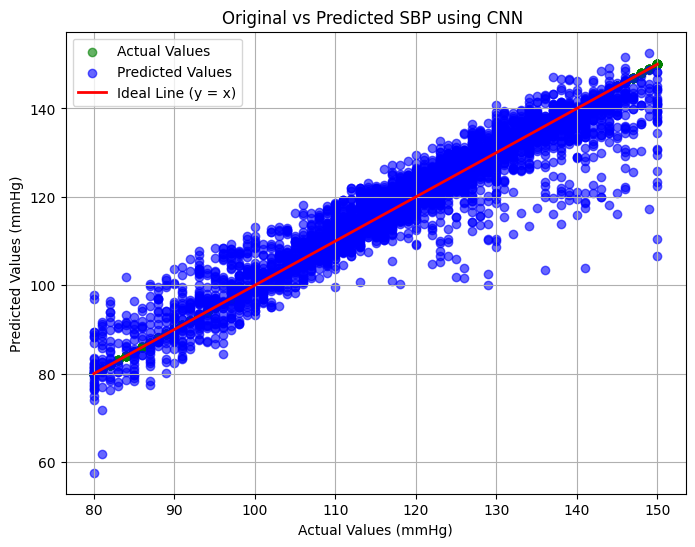

In [394]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import pandas as pd

# Assuming `y_test_actual_series` and `y_test_predict_actual_cnn_series` are the actual and predicted values
# Create a DataFrame for comparison
predictions_cnn1 = pd.DataFrame({
    'Actual SBP': y_test_actual_series,
    'Predict SBP': y_test_predict_actual_cnn_series
})

# Format the values to show 2 decimal places for consistency
predictions_cnn1['Actual SBP'] = predictions_cnn1['Actual SBP'].apply(lambda x: f"{x:.2f}")
predictions_cnn1['Predict SBP'] = predictions_cnn1['Predict SBP'].apply(lambda x: f"{x:.2f}")

# Extract actual and predicted values as arrays for the linear regression
y_test = predictions_cnn1['Actual SBP'].astype(float).to_numpy()  # Convert to NumPy array
y_pred_cnn_flat = predictions_cnn1['Predict SBP'].astype(float).to_numpy()

# Perform linear regression on CNN predictions
lr = LinearRegression()
lr.fit(y_pred_cnn_flat.reshape(-1, 1), y_test)  # Reshape for the linear regression model

# Predict values using linear regression
y_lr_pred = lr.predict(y_pred_cnn_flat.reshape(-1, 1))

# Plotting the regression graph
plt.figure(figsize=(8, 6))

# Plot actual values (green color)
plt.scatter(y_test, y_test, color='green', label='Actual Values', alpha=0.6, marker='o')  # Actual values in green

# Plot predicted values (blue color)
plt.scatter(y_test, y_lr_pred, color='blue', label='Predicted Values', alpha=0.6, marker='o')  # Predicted values in blue

# Plot the regression line (ideal line)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2, label='Ideal Line (y = x)')

# Add titles and labels
print('The CNN Model Reasult for the Systolic Blood Pressure')
plt.title('Original vs Predicted SBP using CNN ')
plt.xlabel('Actual Values (mmHg)')
plt.ylabel('Predicted Values (mmHg)')

# Add a legend to the graph
plt.legend()

# Display the plot
plt.grid(True)
plt.show()

# Optionally, display the formatted DataFrame
#print(predictions_cnn1)


### Distolic Blood Pressure using Convolutional Neural Netwrok Model

In [395]:
df4.drop(['Systolic_blood_pressure (mmHg)'], axis=1, inplace=True)


In [396]:
df4

,PAT_Max,PPG_Peak_amplitude,R_Peak_amplitude,Pulse_Interval(ms),R_R_Interval,Heart_Rate(bpm),Diastolic_blood_pressure (mmHg),Stroke_Volume(ml),Subject,Age,Height(cm),Weight(kg),Gender,Posture,Session
0,290.000,974.504,22.499,657.000,664.000,90,81,57.104,1,44,165,100,0,1,1
1,292.000,899.462,21.937,646.000,644.000,93,81,54.096,1,44,165,100,0,1,1
2,288.000,949.886,16.821,636.000,640.000,93,82,55.040,1,44,165,100,0,1,1
3,281.000,948.092,22.513,645.000,652.000,92,84,57.376,1,44,165,100,0,1,1
4,283.000,777.342,22.542,668.000,520.000,115,83,45.760,1,44,165,100,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17908,510.000,101.892,33.019,741.000,779.000,77,53,49.856,12,58,175,83,0,8,5
17909,368.000,85.771,36.333,470.000,612.000,98,61,42.840,12,58,175,83,0,8,5
17910,328.000,170.600,35.488,666.000,706.000,84,65,50.832,12,58,175,83,0,8,5
17911,316.000,287.212,30.598,694.000,706.000,84,66,52.244,12,58,175,83,0,8,5


In [397]:
df4.columns

Index(['PAT_Max', 'PPG_Peak_amplitude', 'R_Peak_amplitude',
       'Pulse_Interval(ms)', 'R_R_Interval', 'Heart_Rate(bpm)',
       'Diastolic_blood_pressure (mmHg)', 'Stroke_Volume(ml)', 'Subject',
       'Age', 'Height(cm)', 'Weight(kg)', 'Gender', 'Posture', 'Session'],
      dtype='object')

In [398]:
X = df4.drop(['Diastolic_blood_pressure (mmHg)'], axis=1)
y = df4[['Diastolic_blood_pressure (mmHg)']]

In [399]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten, Dropout, MaxPooling1D
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
np.random.seed(42)

In [400]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [401]:
# Convert DataFrame to NumPy arrays if they are DataFrames
X_train = np.array(X_train)
X_test = np.array(X_test)

In [402]:
# Reshape data for CNN (1D convolution expects input shape: [samples, time_steps, features])
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [403]:
# Scale the target variable (optional, for better performance)
y_train = np.array(y_train).reshape(-1, 1)  # Convert y_train to numpy array and reshape
y_test = np.array(y_test).reshape(-1, 1)    # Convert y_test to numpy array and reshape

In [404]:
y_scaler = StandardScaler()
y_train = y_scaler.fit_transform(y_train).flatten()  # Flatten after scaling
y_test = y_scaler.transform(y_test).flatten()        # Flatten after scaling

In [405]:
# Build CNN model
model2 = Sequential()
model2.add(Conv1D(64, 3, activation='relu', input_shape=(X_train.shape[1], 1)))
model2.add(MaxPooling1D(2))
model2.add(Dropout(0.2))
model2.add(Flatten())
model2.add(Dense(64, activation='relu'))
model2.add(Dense(1))  # Regression output (no activation function)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [406]:
# Compile the model
model2.compile(optimizer='adam', loss='mean_squared_error')


In [407]:
from tensorflow.keras.callbacks import EarlyStopping, Callback
# Define an in-memory callback for saving the model weights
class InMemoryCheckpoint(Callback):
    def __init__(self):
        super().__init__()
        self.best_weights = None

    def on_epoch_end(self, epoch, logs=None):
        # Save the best weights at the end of each epoch
        if self.best_weights is None or logs['val_loss'] < self.best_weights[0]:
            self.best_weights = (logs['val_loss'], self.model.get_weights())

    def restore_best_weights(self):
        # Restore the best weights to the model
        if self.best_weights:
            self.model.set_weights(self.best_weights[1])

In [408]:
# Train the model with early stopping
early_stopping2 = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)


In [409]:
in_memory_checkpoint2 = InMemoryCheckpoint()

In [410]:
# Train the model with the callbacks
history = model2.fit(
    X_train, y_train,
    epochs=15,
    batch_size=16,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping2, in_memory_checkpoint2]
)

Epoch 1/15
896/896 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 422.5963 - val_loss: 3.3300
Epoch 2/15
896/896 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 3.8631 - val_loss: 0.8320
Epoch 3/15
896/896 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 1.0382 - val_loss: 0.2820
Epoch 4/15
896/896 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.7800 - val_loss: 0.2271
Epoch 5/15
896/896 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 1.0261 - val_loss: 0.7303
Epoch 6/15
896/896 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.8910 - val_loss: 0.2961
Epoch 7/15
896/896 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.7302 - val_loss: 1.1140
Epoch 8/15
896/896 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.9069 - val_loss: 0.1596
Epoch 9/15
896/896 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.4811 - val_loss: 0.1816
Epoch 10/15
896/896 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.3933 - val_loss: 0.1242
Epoch 11/15
896/896 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.2888 - val_loss: 0.3125
Epoch 12/15
896/896 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/st

In [411]:
# Evaluate the model
loss = model2.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")


112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1060
Test Loss: 0.10413464903831482


In [412]:
# CNN predictions
y_pred_cnn = model2.predict(X_test)

112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [413]:
# Ensure predictions are in the correct shape for regression (flatten)
y_pred_cnn_flat = y_pred_cnn.flatten()

In [414]:
# Calculate Mean Absolute Error (MAE)
from sklearn.metrics import mean_absolute_error
mae4 = mean_absolute_error(y_test, y_pred_cnn)
print(f"Mean Absolute Error (MAE): {mae4}")


# Calculate Mean Squared Error (MSE)
from sklearn.metrics import mean_squared_error
mse4 = mean_squared_error(y_test, y_pred_cnn)
print(f"Mean Squared Error (MSE): {mse4}")


# Calculate Root Mean Squared Error (RMSE)
import numpy as np
rmse4 = np.sqrt(mse4)
print(f"Root Mean Squared Error (RMSE): {rmse4}")

# Calculate R-squared (R2) score
from sklearn.metrics import r2_score
lr_r2_test4 = r2_score(y_test, y_pred_cnn)
print(f"R-squared (R2) score: {lr_r2_test4}")

Mean Absolute Error (MAE): 0.2446674734529291
Mean Squared Error (MSE): 0.10413463814315001
Root Mean Squared Error (RMSE): 0.32269898999400354
R-squared (R2) score: 0.8910970481203611


In [415]:
import pandas as pd
import numpy as np

# Assuming 'scaler_target' is the scaler used for normalizing the target (e.g., MinMaxScaler, StandardScaler)
# Assuming `y_test_scaled` is the scaled actual target values from the test set.
# Assuming `y_pred_cnn_flat` is the CNN model's predicted values on the test set.

# Reshape y_test to 2D before inverse transformation
y_test_reshaped = y_test.reshape(-1, 1)  # Reshape to 2D (required by the scaler)
y_test_actual = y_scaler.inverse_transform(y_test_reshaped)  # Inverse transform the actual target values

# Reshape y_pred_cnn_flat to 2D before applying inverse_transform
y_pred_cnn_flat_reshaped = y_pred_cnn_flat.reshape(-1, 1)  # Reshape to 2D (required by the scaler)
y_test_predict_actual_cnn = y_scaler.inverse_transform(y_pred_cnn_flat_reshaped)  # Inverse transform CNN's predicted values

# Flatten the results (if they are multi-dimensional) to ensure they are 1D for comparison
y_test_actual_flat = y_test_actual.flatten()
y_test_predict_actual_cnn_flat = y_test_predict_actual_cnn.flatten()

# Convert the results into pandas Series for easy comparison
y_test_actual_series = pd.Series(y_test_actual_flat, name='Actual DBP')
y_test_predict_actual_cnn_series = pd.Series(y_test_predict_actual_cnn_flat, name='Predict DBP')

# Create a DataFrame for comparison
predictions_cnn2 = pd.DataFrame({
    'Actual DBP': y_test_actual_series,
    'Predict DBP': y_test_predict_actual_cnn_series
})

# Format the values to show 2 decimal places for consistency
predictions_cnn2['Actual DBP'] = predictions_cnn2['Actual DBP'].round(2)
predictions_cnn2['Predict DBP'] = predictions_cnn2['Predict DBP'].round(2)

# Show the predictions with formatted values
#print(predictions_cnn1)

In [416]:
predictions_cnn2['Index'] = range(1, len(predictions_cnn2) + 1)

predictions_cnn2

,Actual DBP,Predict DBP,Index
0,83.000,83.240,1
1,57.000,52.660,2
2,90.000,86.570,3
3,63.000,65.030,4
4,88.000,86.620,5
...,...,...,...
3578,60.000,58.720,3579
3579,85.000,81.020,3580
3580,87.000,87.330,3581
3581,93.000,89.470,3582


The CNN Model Reasult for the Diastolic Blood Pressure


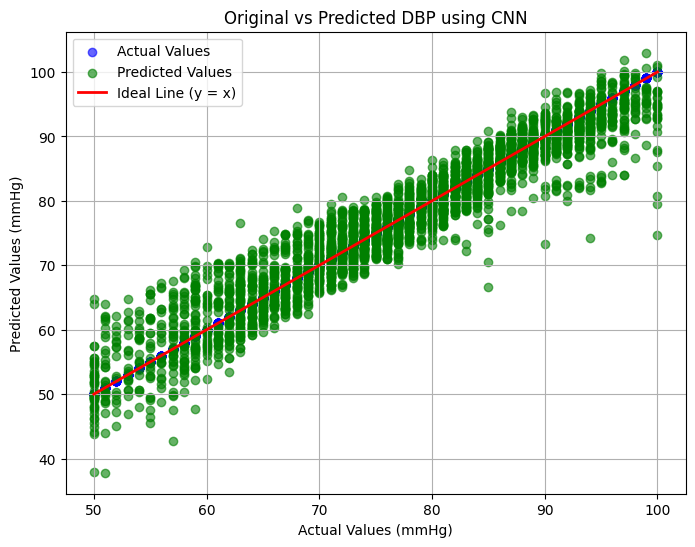

In [417]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import pandas as pd

# Assuming `y_test_actual_series` and `y_test_predict_actual_cnn_series` are the actual and predicted values
# Create a DataFrame for comparison
predictions_cnn2 = pd.DataFrame({
    'Actual DBP': y_test_actual_series,
    'Predict DBP': y_test_predict_actual_cnn_series
})

# Format the values to show 2 decimal places for consistency
predictions_cnn2['Actual DBP'] = predictions_cnn2['Actual DBP'].apply(lambda x: f"{x:.2f}")
predictions_cnn2['Predict DBP'] = predictions_cnn2['Predict DBP'].apply(lambda x: f"{x:.2f}")

# Extract actual and predicted values as arrays for the linear regression
y_test = predictions_cnn2['Actual DBP'].astype(float).to_numpy()  # Convert to NumPy array
y_pred_cnn_flat = predictions_cnn2['Predict DBP'].astype(float).to_numpy()

# Perform linear regression on CNN predictions
lr = LinearRegression()
lr.fit(y_pred_cnn_flat.reshape(-1, 1), y_test)  # Reshape for the linear regression model

# Predict values using linear regression
y_lr_pred = lr.predict(y_pred_cnn_flat.reshape(-1, 1))

# Plotting the regression graph
plt.figure(figsize=(8, 6))

# Plot actual values (green color)
plt.scatter(y_test, y_test, color='blue', label='Actual Values', alpha=0.6, marker='o')  # Actual values in green

# Plot predicted values (blue color)
plt.scatter(y_test, y_lr_pred, color='green', label='Predicted Values', alpha=0.6, marker='o')  # Predicted values in blue

# Plot the regression line (ideal line)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2, label='Ideal Line (y = x)')

# Add titles and labels
print('The CNN Model Reasult for the Diastolic Blood Pressure')
plt.title('Original vs Predicted DBP using CNN')
plt.xlabel('Actual Values (mmHg)')
plt.ylabel('Predicted Values (mmHg)')

# Add a legend to the graph
plt.legend()

# Display the plot
plt.grid(True)
plt.show()

# Optionally, display the formatted DataFrame
#print(predictions_cnn1)


In [418]:
# Add an 'Index' column with automatic sequential values starting from 1
predictions_cnn1['Index'] = range(1, len(predictions_cnn1) + 1)

#predictions_cnn1

In [419]:
predictions_cnn2['Index'] = range(1, len(predictions_cnn2) + 1)

#predictions_cnn2

In [420]:
# Merge the two datasets on 'ID' column
merged_predictions_cnn = pd.merge(predictions_cnn1,predictions_cnn2,on='Index',how='left')

# Display the merged dataset
merged_predictions_cnn.drop('Index', axis=1, inplace=True)
print("The reasult of the CNN in SBP and DBP")
merged_predictions_cnn

The reasult of the CNN in SBP and DBP


,Actual SBP,Predict SBP,Actual DBP,Predict DBP
0,127.00,130.91,83.00,83.24
1,89.00,88.58,57.00,52.66
2,136.00,135.50,90.00,86.57
3,99.00,105.22,63.00,65.03
4,133.00,135.58,88.00,86.62
...,...,...,...,...
3578,94.00,96.80,60.00,58.72
3579,129.00,128.75,85.00,81.02
3580,132.00,132.82,87.00,87.33
3581,140.00,137.11,93.00,89.47


### Combine All Reasult

In [421]:
# Create the performance metrics DataFrame
metrics = pd.DataFrame({
    'Metric': ['Mean Absolute Error', 'Mean Squared Error (MSE)', 'Root Mean Squared Error (RMSE)', 'R² Score'],
    'Linear Regression Systolic': [mae1, mse1, rmse1, lr_r2_test1],
    'Linear Regression Diastolic': [mae2, mse2, rmse2, lr_r2_test2],
    'CNN Systolic': [mae3, mse3, rmse3, lr_r2_test3],
    'CNN Diastolic': [mae4, mse4, rmse4, lr_r2_test4]
})

# Set 'Metric' column as the index
metrics.set_index('Metric', inplace=True)

# Display the predictions table with the performance metrics in 2D format
print("Performance Metrics (2D Format):")
metrics

Performance Metrics (2D Format):


,Linear Regression Systolic,Linear Regression Diastolic,CNN Systolic,CNN Diastolic
Metric,,,,
Mean Absolute Error,0.033,0.036,0.227,0.245
Mean Squared Error (MSE),0.002,0.002,0.106,0.104
Root Mean Squared Error (RMSE),0.045,0.048,0.326,0.323
R² Score,0.965,0.960,0.889,0.891
